# Confusion matrix and AUC-score

In the following we would like to explore two related concepts to further judge the quality of a classification model, i.e. find a way to quantify the misclassifications. This is done via the so-called confusion matrix and the ROC-curve/AUC-score which allow us to compute the true-positive and false-positive rates and compare them.

We seek to compare results for 5 classifiers here (logistic regressions, KNN, Random forest and SVM with an RBF kernel). The information to be classified is based on a simple data set with success/failure categories.

## 1) Confusion matrix

In the most simple example with two classification categories one is led to the confusion matrix scheme:

|#|Model: not true | Model: true|
|-|-|-|
|**reality: not true** | true negative | false positive|
|**reality: true** | false negative | true positive|

Example: 

false positive: positive prediction via model BUT was false
true negative: negative prediction via model AND was true

We would like to keep the number of false negatives small.

For further information regarding this structure, we refer to https://en.wikipedia.org/wiki/Confusion_matrix.

In [2]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [3]:
#define data frame
df = pd.read_csv("classification.csv")

#to trop columns 
#df = df.drop("name of column", axis = 1)

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
#define variables and proceed with train/test split
X = df[["age", "interest"]].values
Y = df["success"].values #single brackets (!) needed for classification machine learling processing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#train logistic regression model
#one - vs - all classification

model1 = LogisticRegression()
model1.fit(X_train, Y_train)

print("Score: " + str(model1.score(X_test, Y_test)))

Score: 0.88


/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
#train logistic regression model
#one - vs - one classification

from sklearn.multiclass import OneVsOneClassifier

model2 = OneVsOneClassifier(LogisticRegression())

model2.fit(X_train, Y_train)

print("Score: " + str(model2.score(X_test, Y_test)))

Score: 0.88


/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
Y_test_pred1 = model1.predict(X_test)
Y_test_pred2 = model2.predict(X_test)

In [17]:
#print(Y_test)
print(Y_test_pred1)
#print(Y_test_pred2)

[1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1.]


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_test_pred1)

array([[29,  8],
       [ 1, 37]])

In [19]:
confusion_matrix(Y_test, Y_test_pred2)

array([[29,  8],
       [ 1, 37]])

In [68]:
#train KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors = 5) #standard is n_neighbors = 5

model3.fit(X_train, Y_train)

Y_test_pred3 = model3.predict(X_test)

print("Score: " + str(model3.score(X_test, Y_test)))

Score: 0.9466666666666667


In [67]:
confusion_matrix(Y_test, Y_test_pred3)

array([[33,  4],
       [ 1, 37]])

In [54]:
#train random forest classifier
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(criterion = "entropy", n_estimators = 25)

model4.fit(X_train, Y_train)

Y_test_pred4 = model4.predict(X_test)

print("Score: " + str(model4.score(X_test, Y_test)))

Score: 0.9466666666666667


In [55]:
confusion_matrix(Y_test, Y_test_pred4)

array([[34,  3],
       [ 1, 37]])

In [72]:
#train SVM RBF kernel classifier
from sklearn.svm import SVC

#Kernel form K(x,x')=exp(-||x-x'||^2/(2gamma^2))
#gamma large: kernel strongly peaked, gamma small: kernel slowly decaying wide peak
#C value as for linear kernels modulates emphasis of landmark data points
model5 = SVC(kernel = "rbf", gamma = 0.1, C = 8,probability=True)

model5.fit(X_train, Y_train)

Y_test_pred5 = model5.predict(X_test)

print("Score: " + str(model5.score(X_test, Y_test)))

Score: 0.9466666666666667


In [73]:
confusion_matrix(Y_test, Y_test_pred5)

array([[33,  4],
       [ 0, 38]])

Judging by the information encoded by the confusion matrices we see that the models accurately classify the data points, as the off-diagonal entries are rather small. To further quantify the quality of our models, we have to resort to the AUC-score.

## 2) ROC-curve and AUC-score

The Receiver-operating-characteristic curve plots the true-postive rates over the false-positive rates for a respective model. The area-under-curve (AUC) is numerically obtained from the plot. The higher the value to 1 the better it is. For further information regarding these points, we refer to https://en.wikipedia.org/wiki/Receiver_operating_characteristic.

In [77]:
#predict Y values according to respective model from test data X_test, output in terms of probabilities (as compared to model1.predict(X_test))
Y_test_pred1 = model1.predict_proba(X_test)[:,1] #all lines of second column (1st and 2nd column are linearly dependent)
# Y_test_pred2 = model2.predict_proba(X_test)[:,1] #'OneVsOneClassifier' object has no attribute 'predict_proba'
Y_test_pred3 = model3.predict_proba(X_test)[:,1]
Y_test_pred4 = model4.predict_proba(X_test)[:,1]
Y_test_pred5 = model5.predict_proba(X_test)[:,1]

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

In [83]:
#compute ROC curve
# false-positive rate, true-positive rate, threshold values
fpr1, tpr1, thresholds1 = roc_curve(Y_test,Y_test_pred1)
fpr3, tpr3, thresholds3 = roc_curve(Y_test,Y_test_pred3)
fpr4, tpr4, thresholds4 = roc_curve(Y_test,Y_test_pred4)
fpr5, tpr5, thresholds5 = roc_curve(Y_test,Y_test_pred5)

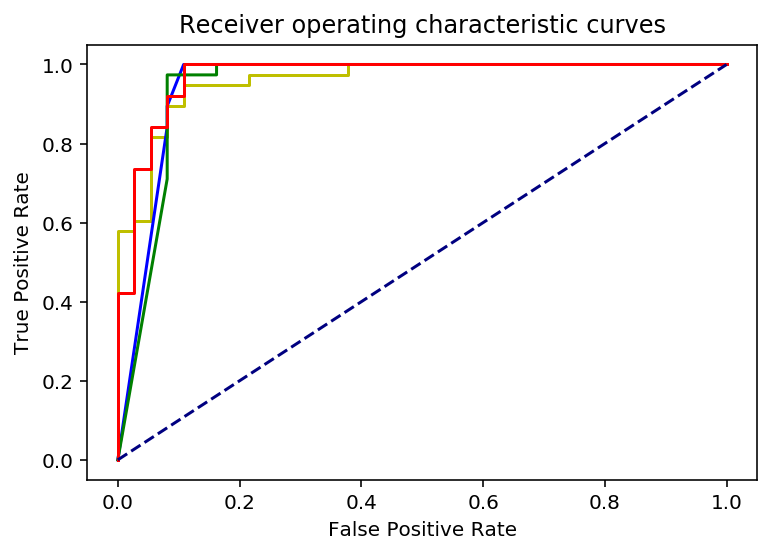

In [97]:
#plot ROC curve
#ideal curve would be step function
plt.plot(fpr1, tpr1, color = 'y')
plt.plot(fpr3, tpr3, color = 'b')
plt.plot(fpr4, tpr4, color = 'g')
plt.plot(fpr5, tpr5, color = 'r')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.show()

One may say that despite the R2-score values for the models being rather close that the ROC-curve can be used to distinguish the quality of the models even further. As it seems, the SVM model with RBF kerel fits the data pretty well, according to the 2 score types. This is numerically confirmed by computing the AUC score:

In [93]:
print(roc_auc_score(Y_test,Y_test_pred1))
print(roc_auc_score(Y_test,Y_test_pred3))
print(roc_auc_score(Y_test,Y_test_pred4))
print(roc_auc_score(Y_test,Y_test_pred5))

0.9601706970128023
0.9516358463726884
0.9455903271692746
0.9708392603129445
